Till now in MLP - Multi Layer Preceptron 

In [1]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# this imports a Flatten Layer to convert the image matrix into a vector

# this also defines the neural network architecture 

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Why Convolutions

Spatial invariance or loss in features

The spatial features of a 2D images are lost when it is flattened to 1D vector input. Before feeding an image to the hidden layers of an MLP, we must flatten the image matrix to a 1D vector, as we saw in the mini project. This implies that all of the images 2D information is discarded.

In [2]:
import os
import cv2
img = cv2.imread(os.path.join('.', 'car.jpg'))

# Printing image matrix
print(img)


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


RGB Channel

In [3]:
img[:,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
img[:,:,1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [5]:
img[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

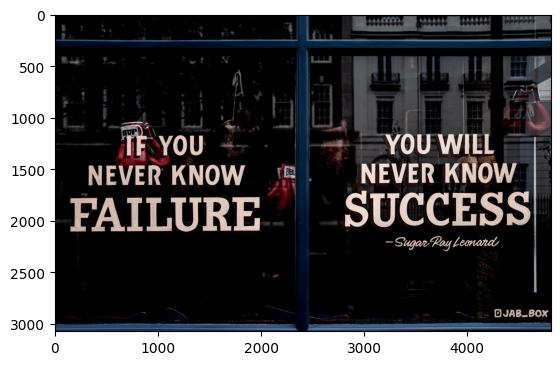

In [6]:
# For reading image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


image = mpimg.imread('quote.jpg')

plt.imshow(image)

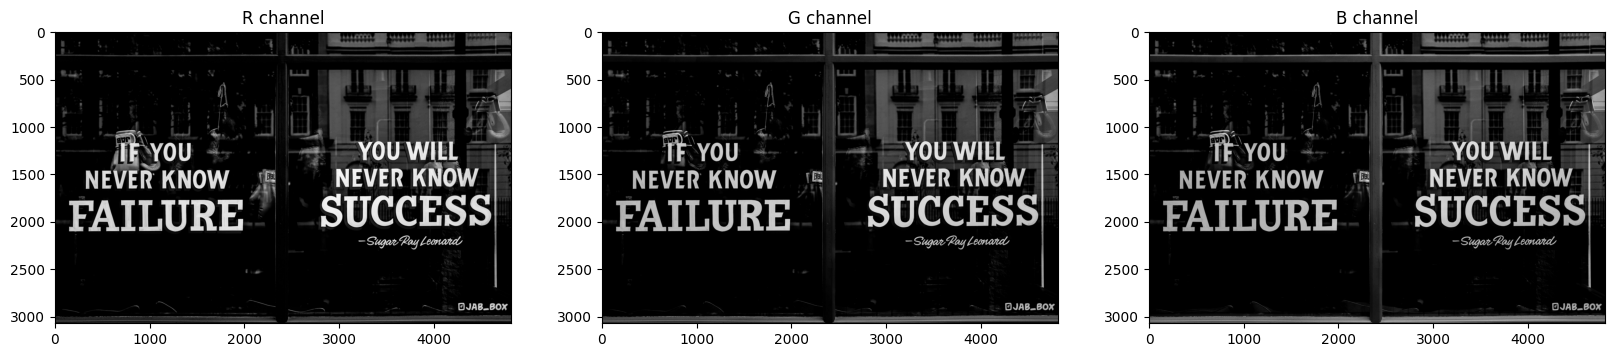

In [7]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

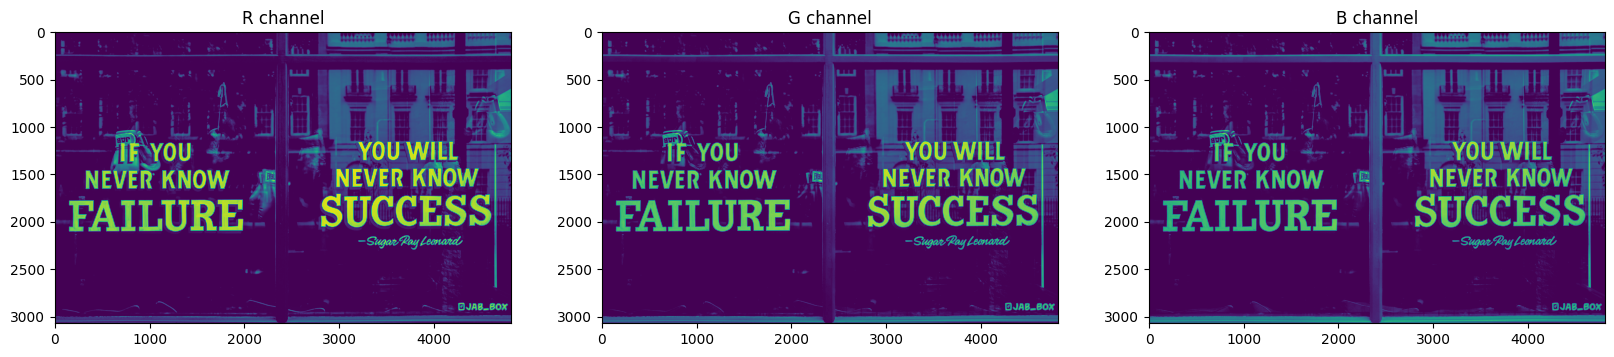

In [8]:
# Isolate RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r)
ax2.set_title('G channel')
ax2.imshow(g)
ax3.set_title('B channel')
ax3.imshow(b)

# Focus on filters

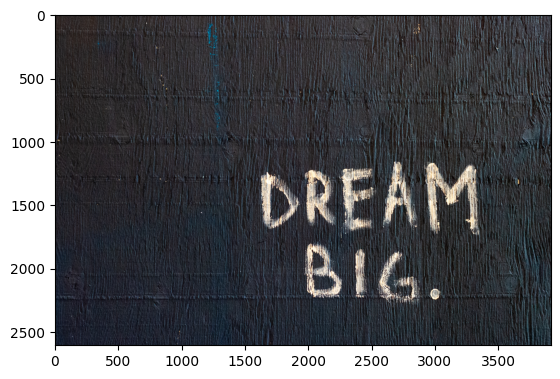

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('sample.jpg')

plt.imshow(image)

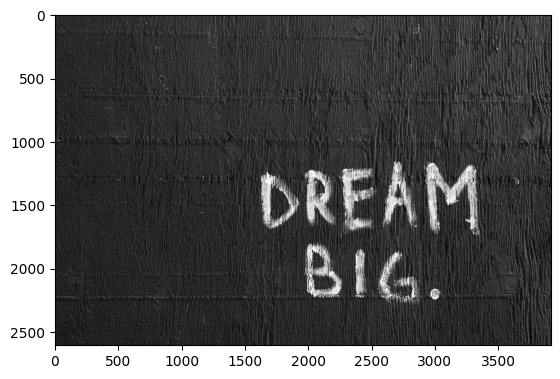

In [10]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

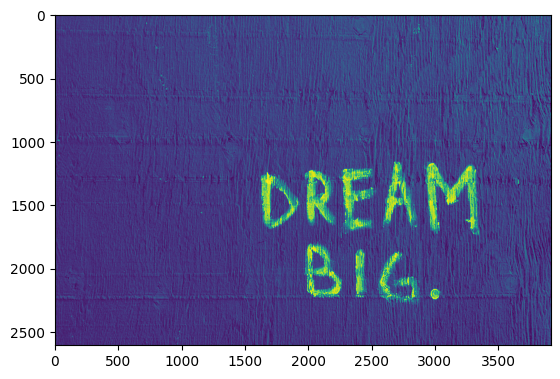

In [11]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray)

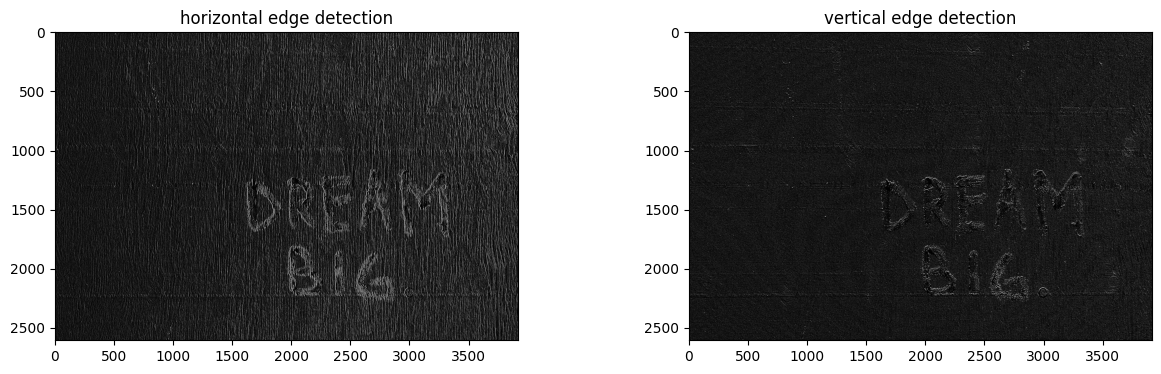

In [12]:
sobel_y = np.array([[ -1, -2, -1],
                   [ 0, 0, 0],
                   [ 1, 2, 1]])

# vertical edge detection

sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# filter the image using filter2D(grayscale image, bit-depth, kernel)
filtered_image1 = cv2.filter2D(gray, -1, sobel_x)   # -1 means the dimension of output is same as output 
filtered_image2 = cv2.filter2D(gray, -1, sobel_y)
f, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_title('horizontal edge detection')
ax[0].imshow(filtered_image1, cmap='gray')
ax[1].set_title('vertical edge detection')
ax[1].imshow(filtered_image2, cmap='gray')

# Intution of CNN

In this  notebook, we train a Convolutional Neural Network to classify images from the MNIST database.

1. Load MNIST Database

MNIST is one of the most famous datasets in the field of machine learning.

* It has 70000 images of hand-written digits
* Very straight forward to download
* Images dimensions are 28 x 28
* Greyscale images

In [13]:
from tensorflow.keras.datasets import mnist

# Use Keras to import pre-shuffled MNIST database
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples. " % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples. 
The MNIST database has a test set of 10000 examples.


2. Visualizing the First Six Training Images

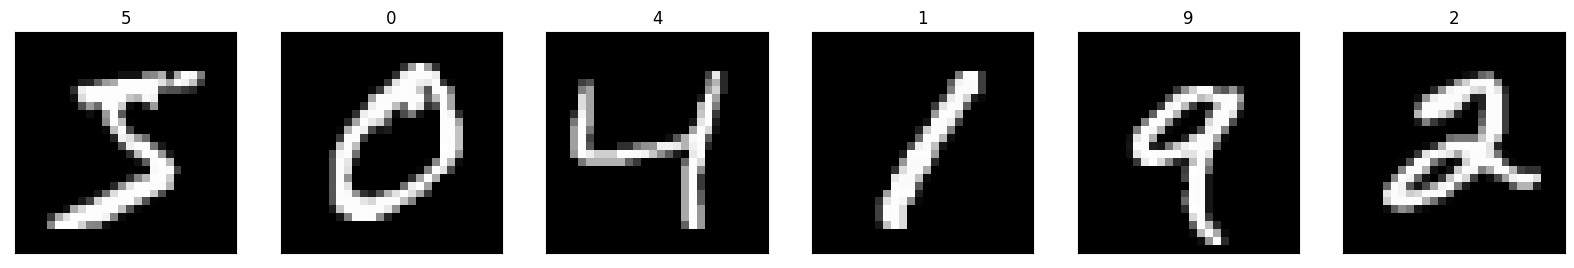

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm 
import numpy as np

#plotting first six training images
fig = plt. figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6, i+1, xticks = [], yticks = [])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

3. Viewing the image in more detail

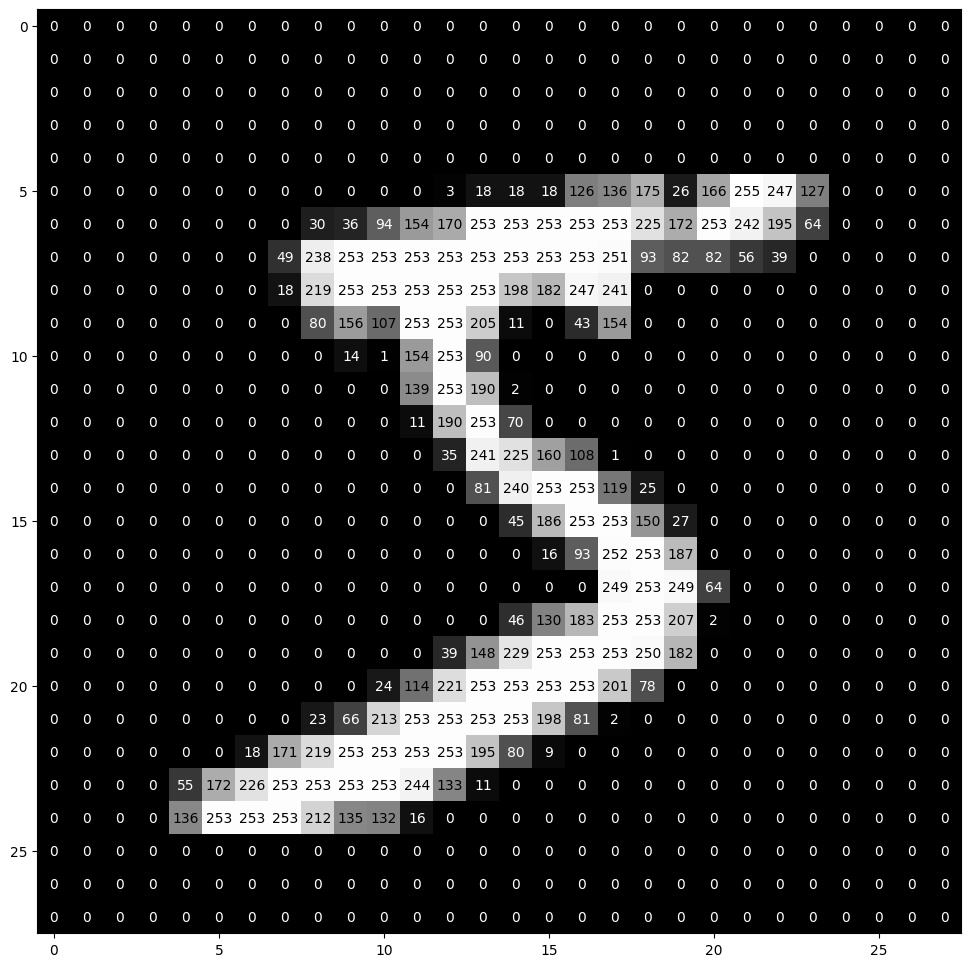

In [15]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/ 2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
            horizontalalignment = 'center', 
            verticalalignment = 'center', 
            color = 'white' if img[x][y] < thresh else 'black')

fig = plt.figure(figsize= (12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

4. Preprocess input images: Rescale the images by Dividing every pixel in every image by 255

In [16]:
# rescale to have values within 0 - 1 range [0, 255] --> [0,1]
X_train = X_train.astype('float32')/ 255
X_test = X_test.astype('float32') / 255

print('X_train shape:', X_train.shape)
print(X_test.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
10000 train samples
10000 test samples


5. Preprocess the labels: Encode Categorical integer Labels Using a One-Hot Scheme

In [17]:
from tensorflow.keras.utils import to_categorical

# from keras.utils import np_utils

num_classes = 10
# print first ten (integer_valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
# Convert class vectors to binary class matrices

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# printing first ten one hot training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Reshaping data to fit out CNN(and input_shape)

In [20]:
# input image dimensions 28 * 28 pixel images.

img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('input_shape:', input_shape)
print('X_train shape:', X_train.shape)

input_shape: (28, 28, 1)
X_train shape: (60000, 28, 28, 1)
